Setup and Load Data

In [1]:
# To import the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2 as cv
import imghdr

C:\Users\Andelib\AppData\Local\Temp\ipykernel_21656\57807949.py:8: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
# To assign the data directory
data_dir = 'cats'

In [3]:
# To see the files in the data directory

os.listdir(data_dir)

['cheetahs',
 'eurasian_lynx',
 'jaguars',
 'leopards',
 'lions',
 'mountain_lions',
 'panthers',
 'snow_leopards',
 'tigers']

In [4]:
# To declare the types of file extensions allowed

image_exts = ['jpeg', 'jpg', 'bmp', 'png']

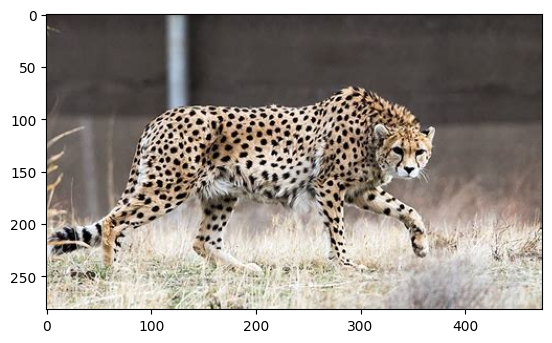

In [5]:
# To show a random image from the dataset 

img = cv.imread(os.path.join('cats', 'cheetahs', 'image44.jpg'))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [6]:
# To remove dodgy images

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')
            

In [7]:
data = tf.keras.utils.image_dataset_from_directory('cats')

Found 865 files belonging to 9 classes.


In [8]:
# To assign the iterator 

data_iterator = data.as_numpy_iterator()

In [9]:
# To get a batch for the iterator

batch = data_iterator.next()

In [10]:
# To represent the image as a numpy array

batch[0].shape

(32, 256, 256, 3)

In [11]:
# To represent the image as a numpy array

batch[1]

array([0, 8, 2, 8, 2, 2, 3, 4, 1, 5, 1, 4, 6, 6, 0, 3, 4, 8, 2, 8, 2, 8,
       2, 8, 6, 5, 8, 0, 4, 7, 2, 1])

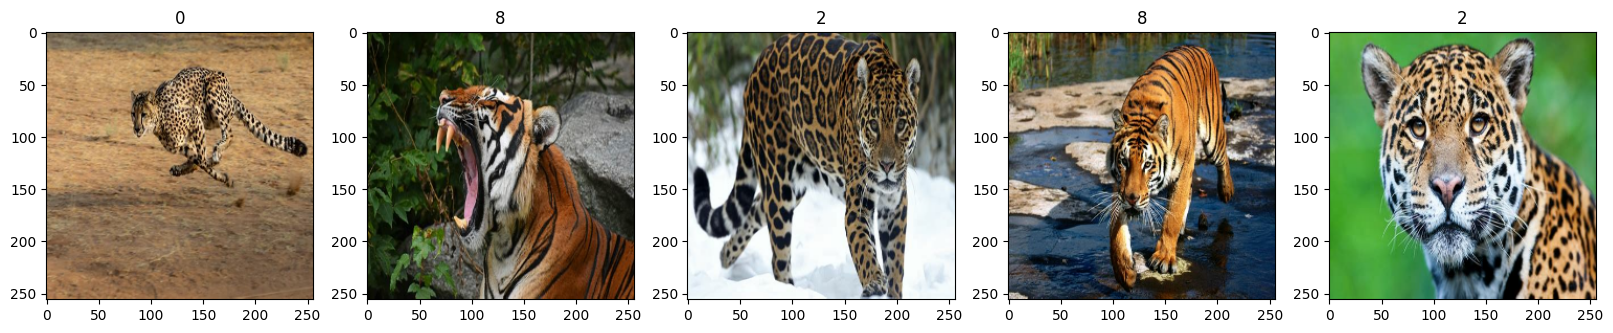

In [12]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing Data

In [13]:
# To scale the data

scaled_data = data.map(lambda a, b : (a/255, b)) # a -> images, b -> labels

In [14]:
scaled_iterator = scaled_data.as_numpy_iterator()
batch = scaled_iterator.next()
print(f'Min: {batch[0].min()} and Max: {batch[0].max()}')

Min: 0.0 and Max: 1.0


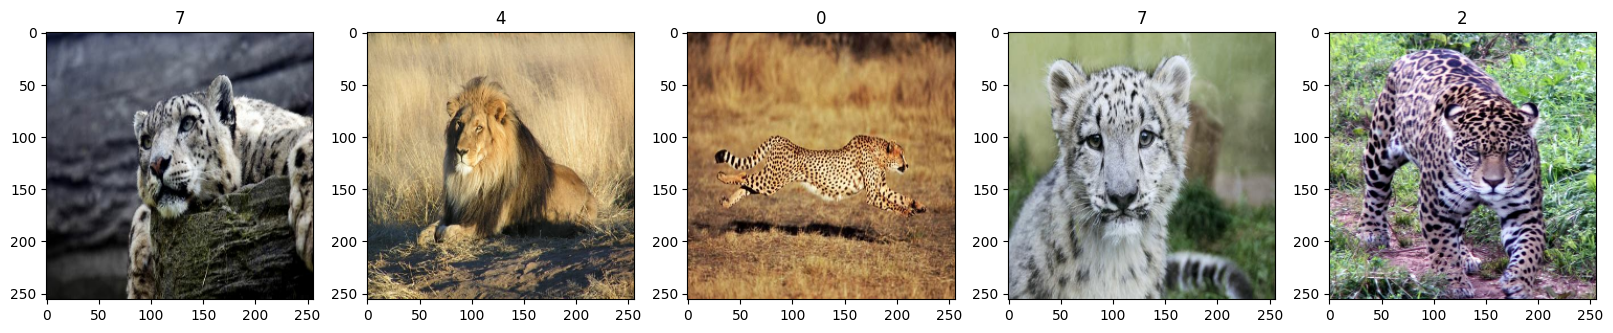

In [15]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Spitting the data

In [16]:
len(scaled_data)

28

In [17]:
train_size = int(len(scaled_data) * 0.7)
val_size = int(len(scaled_data) * 0.2) + 1
test_size = int(len(scaled_data) * 0.1) + 1

total = test_size + val_size + train_size

print(f'Train Size: {train_size}, Val Size: {val_size}, Test Size: {test_size}')
print(f'Total Size : {total}')

Train Size: 19, Val Size: 6, Test Size: 3
Total Size : 28


In [18]:
train  = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

print(f'Training length: {len(train)}, Validation length: {len(val)}, Testing length: {len(test)}')

Training length: 19, Validation length: 6, Testing length: 3


Deep Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
# To create the model

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(9, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,698,681 (14.11 MB)

 Trainable params: 3,698,681 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [28]:
# To create the logs

logdir  = 'logs'
tensorboard_callback  = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
# To train the model

history =  model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


: 